In [1]:
import sys
sys.version


'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [2]:
from neuralprophet import NeuralProphet
from util_func import preprocess_time_series

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [4]:
# Specify the path to your CSV file
csv_file_path = "data/ts1.csv"  # Update this with the actual path to your CSV file

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)

      crn     date  stime  etime  itype  depth      chl    phaeo       l12  \
0       #   yymmdd   hhmm   hhmm             m    mg/m3    mg/m3   mg C/m3   
1       1   881031     -9     -9      0     24    0.129    0.077    12.210   
2       1   881031     -9     -9      0     42    0.192    0.051     2.470   
3       1   881031     -9     -9      0     68    0.285    0.303     2.580   
4       1   881031     -9     -9      0    114    0.326    0.044     0.720   
...   ...      ...    ...    ...    ...    ...      ...      ...       ...   
2585  339   220901    443   1948      2     75    0.180    0.227    -9.000   
2586  339   220901    443   1948      2    100    0.208    0.578    -9.000   
2587  339   220901    443   1948      2    125    0.130    0.418    -9.000   
2588  339   220901    443   1948      2    150    0.076    0.310    -9.000   
2589  339   220901    443   1948      2    175    0.038    0.128    -9.000   

           d12      bsal     pbact     hbact     sbact     ebac

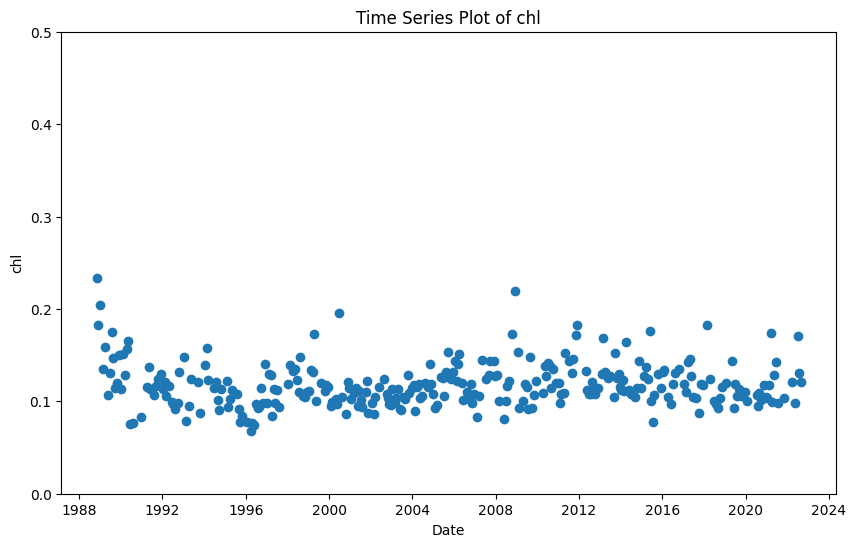

In [5]:
# Convert 'data' column to datetime format
df[' date'] = pd.to_datetime(df[' date'][1:], format=' %y%m%d')

# Clean and convert 'chl' column to numeric values
df[' chl'] = df[' chl'].apply(lambda x: pd.to_numeric(x.split(), errors='coerce').mean())

# Calculate the mean for each date
df_chl = df.groupby(' date', dropna=True)[' chl'].mean().reset_index()


## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_chl[' date'], df_chl[' chl'], marker='o', linestyle='')
plt.title('Time Series Plot of chl')
plt.xlabel('Date')
plt.ylabel('chl')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

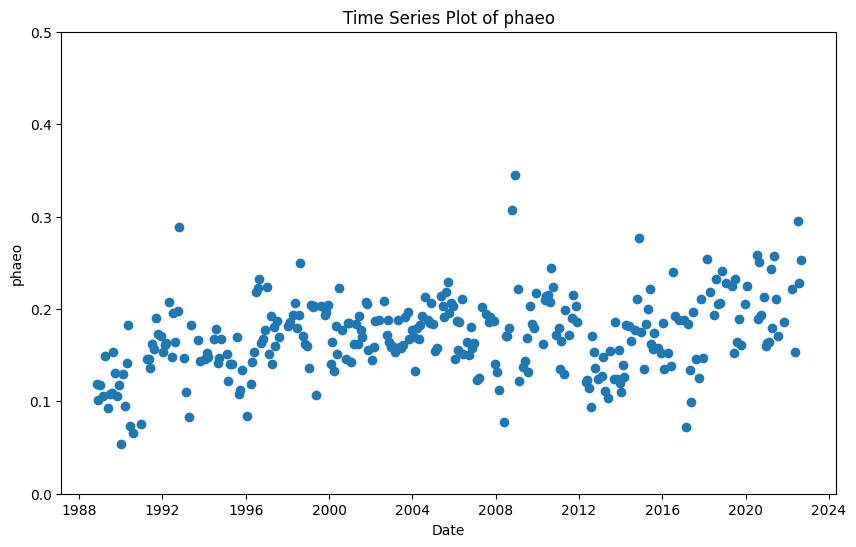

In [6]:
# Clean and convert 'chl' column to numeric values
df[' phaeo'] = df[' phaeo'].apply(lambda x: pd.to_numeric(x.split(), errors='coerce').mean())

# Calculate the mean for each date
df_phaeo = df.groupby(' date', dropna=True)[' phaeo'].mean().reset_index()

## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_phaeo[' date'], df_phaeo[' phaeo'], marker='o', linestyle='')
plt.title('Time Series Plot of phaeo')
plt.xlabel('Date')
plt.ylabel('phaeo')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

In [7]:
# Rename the 'date' column to 'ds'
df_chl.rename(columns={' date': 'ds'}, inplace=True)
df_chl.rename(columns={' chl': 'y'}, inplace=True)
df_chl

,ds,y
0,1988-10-31,0.233000
1,1988-12-02,0.182500
2,1989-01-08,0.204750
3,1989-02-28,0.135500
4,1989-03-27,0.158250
...,...,...
305,2022-03-27,0.120875
306,2022-05-26,0.098250
307,2022-07-09,0.170750
308,2022-07-30,0.130500


In [8]:

from util_func import *


In [9]:
df_chl

,ds,y
0,1988-10-31,0.233000
1,1988-12-02,0.182500
2,1989-01-08,0.204750
3,1989-02-28,0.135500
4,1989-03-27,0.158250
...,...,...
305,2022-03-27,0.120875
306,2022-05-26,0.098250
307,2022-07-09,0.170750
308,2022-07-30,0.130500


In [10]:
df_resampled = preprocess_time_series(df_chl, date_column='ds', value_column='y', target_frequency='M', interpolation_method='linear')

In [12]:
df_resampled2 = replace_negative_with_mean(df_resampled,'y')

In [13]:
df_resampled2 

,ds,y
0,1988-10-31,0.233000
1,1988-11-30,0.123326
2,1988-12-31,0.182500
3,1989-01-31,0.204750
4,1989-02-28,0.135500
...,...,...
403,2022-05-31,0.098250
404,2022-06-30,0.123326
405,2022-07-31,0.301250
406,2022-08-31,0.123326


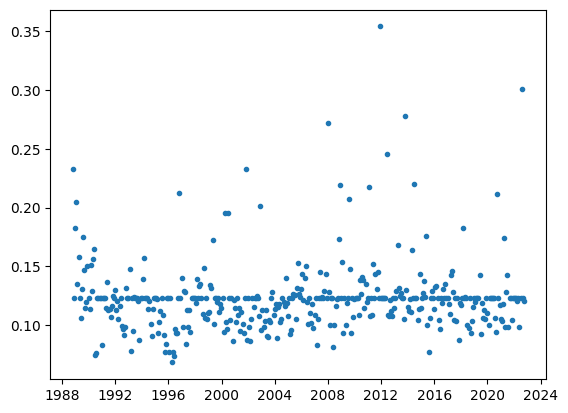

In [19]:
plt.plot(df_resampled2['ds'],df_resampled2['y'],'.')
plt.show()

In [15]:
# Create a NeuralProphet model with default parameters
from neuralprophet import NeuralProphet, set_log_level


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [99.755]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 266
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (13) is too small than the required number                     for the learning rate finder

Finding best initial lr:   0%|          | 0/217 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [99.755]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [99.772]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [99.772]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.data.processing._handle_missing_data) - Dropped 30 rows at the end with NaNs in 'y' column.


Predicting: 13it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


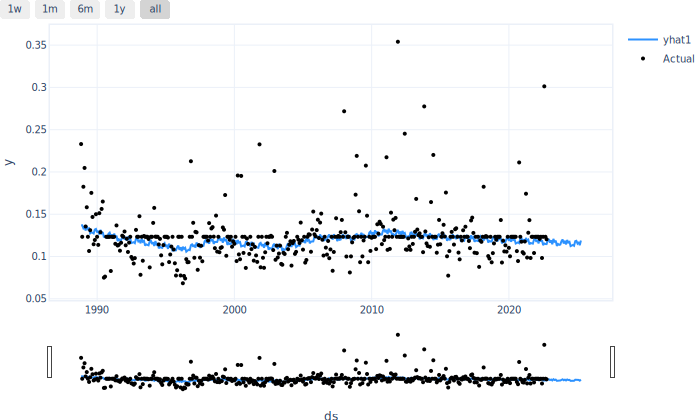

In [16]:
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(df_resampled2)


df_future = m.make_future_dataframe(df_resampled2, n_historic_predictions=True, periods=30)

# Predict the future
forecast = m.predict(df_future)

m.plot(forecast)


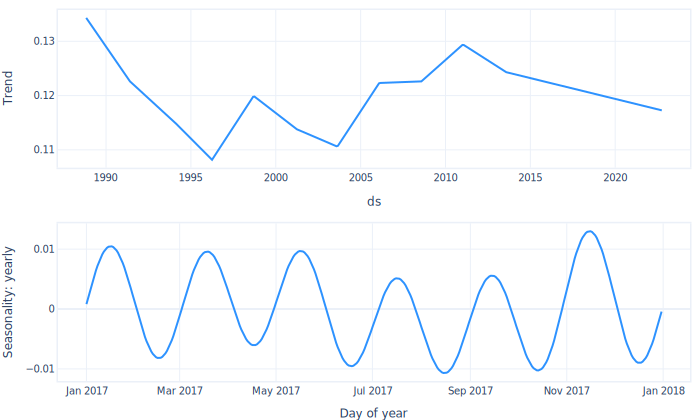

In [17]:
m.plot_parameters(components=["trend", "seasonality"])

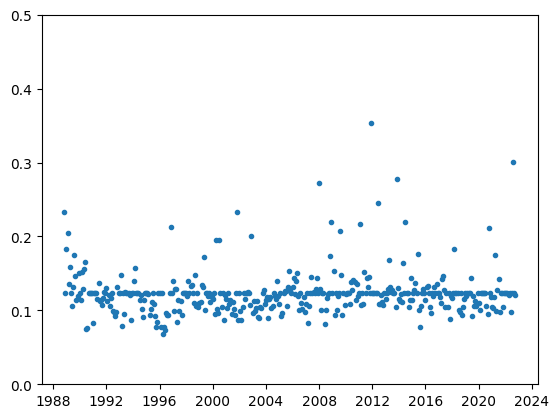

In [18]:
plt.plot(df_resampled['ds'],df_resampled['y'],'.')
plt.ylim([0 , 0.5])
plt.show()